In [21]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


#**Análise de Séries Temporais com xts**

xts - eXtensible Time Series

- Indexação por datas para retornar dados

Fornece um tratamento uniforme das **diferentes classes de dados baseadas no zoo**, maximizando a preservação da informação em formato nativo e permitindo a **personalização** do nível de usuário, ao mesmo tempo em que simplifica a interoperabilidade entre classes


##**Pacote xts**

A série de dados retornada pelo pacote **{quantmod}** vem na forma de um objeto xts

Também precisamos carregar mais um pacote: **{moments}**

O pacote **{moments}** calcula skewness (assimetria) e kurtosis (curtose) para analisar a distribuição dos dados.

In [ ]:
%%R
install.packages("moments")
install.packages("quantmod")
library(quantmod)
library(xts)
library(moments)  

In [32]:
%%R
# Vamos fazer o download dos valores do índice S&P dos últimos 10 anos
# https://www.google.com/finance?cid=700145

### TROCANDO google PELO yahoo. GOOGLE ESTÁ COM ERRO 403 (FORBIDDEN)
getSymbols("SPY", src = "yahoo", from = "2007-01-01", auto.assign = T)

[1] "SPY"


In [33]:
%%R
is.xts(SPY) 

[1] TRUE


In [34]:
%%R
head(SPY)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-01-03   142.25   142.86  140.57    141.37   94807600     107.3601
2007-01-04   141.23   142.05  140.61    141.67   69620600     107.5880
2007-01-05   141.33   141.40  140.38    140.54   76645300     106.7298
2007-01-08   140.82   141.41  140.25    141.19   71655000     107.2235
2007-01-09   141.31   141.60  140.40    141.07   75680100     107.1323
2007-01-10   140.58   141.57  140.30    141.54   72428000     107.4893


In [35]:
%%R
tail(SPY)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2020-06-15   298.02   308.28  296.74    307.05  135782700     305.7047
2020-06-16   315.48   315.64  307.67    312.96  137627500     311.5888
2020-06-17   314.07   314.39  310.86    311.66   82954600     310.2945
2020-06-18   310.01   312.30  309.51    311.78   80828700     310.4140
2020-06-19   314.17   314.38  306.53    308.64  135549600     308.6400
2020-06-22   307.99   311.05  306.75    310.62   74144300     310.6200


O objeto xts se parece com um dataframe, em que **o índice é uma data**

Para análise usaremos apenas os valores de fechamento

##**Subset de Fechamento da cotação**

In [36]:
%%R
SPY.Close <- SPY[, "SPY.Close"]
is.xts(SPY.Close)

[1] TRUE


In [37]:
%%R
head(SPY.Close)

           SPY.Close
2007-01-03    141.37
2007-01-04    141.67
2007-01-05    140.54
2007-01-08    141.19
2007-01-09    141.07
2007-01-10    141.54


Se o xts se comporta como um dataframe, por que devo usá-lo em séries temporais?

- xts fornece os dados já com **índice de data**, o que permite diversas operações, sem a necessidade de conversões adicionais

In [38]:
%%R
x1 <- SPY['2015-01/2016-12']
head(x1)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2015-01-02   206.38   206.88  204.18    205.43  121465900     184.2602
2015-01-05   204.17   204.37  201.35    201.72  169632600     180.9325
2015-01-06   202.09   202.72  198.86    199.82  209151400     179.2284
2015-01-07   201.42   202.72  200.88    202.31  125346700     181.4617
2015-01-08   204.01   206.16  203.99    205.90  147217800     184.6818
2015-01-09   206.40   206.42  203.51    204.25  158567300     183.2018


In [39]:
%%R
x2 <- SPY['/2016-09']
head(x2)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-01-03   142.25   142.86  140.57    141.37   94807600     107.3601
2007-01-04   141.23   142.05  140.61    141.67   69620600     107.5880
2007-01-05   141.33   141.40  140.38    140.54   76645300     106.7298
2007-01-08   140.82   141.41  140.25    141.19   71655000     107.2235
2007-01-09   141.31   141.60  140.40    141.07   75680100     107.1323
2007-01-10   140.58   141.57  140.30    141.54   72428000     107.4893


In [40]:
%%R
tail(x2)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2016-09-23   216.72   216.88  215.88    215.99   73630900     200.7923
2016-09-26   215.02   215.23  214.01    214.24   89827300     199.1655
2016-09-27   214.05   215.68  213.62    215.57   78494800     200.4019
2016-09-28   215.83   216.82  214.71    216.64   87411000     201.3966
2016-09-29   216.40   216.87  214.04    214.68  128070600     199.5745
2016-09-30   215.65   217.12  215.36    216.30  117202900     201.0805


In [41]:
%%R
x3 <- SPY['2016']
tail(x3)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2016-12-22   225.60   225.74  224.92    225.38   56219100     210.7566
2016-12-23   225.43   225.72  225.21    225.71   36697800     211.0652
2016-12-27   226.02   226.73  226.00    226.27   42672500     211.5888
2016-12-28   226.57   226.59  224.27    224.40   64095000     209.8401
2016-12-29   224.48   224.89  223.84    224.35   48696100     209.7934
2016-12-30   224.73   224.83  222.73    223.53  108998300     209.0266


In [42]:
%%R
x4 <- SPY['2016-12']
tail(x4)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2016-12-22   225.60   225.74  224.92    225.38   56219100     210.7566
2016-12-23   225.43   225.72  225.21    225.71   36697800     211.0652
2016-12-27   226.02   226.73  226.00    226.27   42672500     211.5888
2016-12-28   226.57   226.59  224.27    224.40   64095000     209.8401
2016-12-29   224.48   224.89  223.84    224.35   48696100     209.7934
2016-12-30   224.73   224.83  222.73    223.53  108998300     209.0266


In [43]:
%%R
x5 <- to.period(SPY['2015'], 'months')
tail(x5)

           SPY["2015"].Open SPY["2015"].High SPY["2015"].Low SPY["2015"].Close
2015-07-31           207.73           213.18          204.11            210.50
2015-08-31           210.46           211.31          182.40            197.67
2015-09-30           193.12           202.89          186.93            191.63
2015-10-30           192.08           209.44          189.12            207.93
2015-11-30           208.32           211.66          202.18            208.69
2015-12-31           209.44           211.00          199.83            203.87
           SPY["2015"].Volume SPY["2015"].Adjusted
2015-07-31         2452758000             190.5731
2015-08-31         3734926900             178.9576
2015-09-30         3279512900             174.3913
2015-10-30         2536184400             189.2250
2015-11-30         1924512800             189.9166
2015-12-31         2924882300             186.6344


In [44]:
%%R
x6 <- to.period(SPY['2015'], 'quarters') #trimestres
tail(x6)

           SPY["2015"].Open SPY["2015"].High SPY["2015"].Low SPY["2015"].Close
2015-03-31           206.38           212.24          197.86            206.43
2015-06-30           206.39           213.78          204.51            205.85
2015-09-30           207.73           213.18          182.40            191.63
2015-12-31           192.08           211.66          189.12            203.87
           SPY["2015"].Volume SPY["2015"].Adjusted
2015-03-31         7835067100             185.9837
2015-06-30         6464447700             186.3633
2015-09-30         9467197800             174.3913
2015-12-31         7385579500             186.6344


In [47]:
%%R
x7 <- to.monthly(SPY['2016'])
head(x7)

         SPY["2016"].Open SPY["2016"].High SPY["2016"].Low SPY["2016"].Close
Jan 2016           200.49           201.90          181.02            193.72
Feb 2016           192.53           196.68          181.09            193.56
Mar 2016           195.01           206.87          194.45            205.52
Apr 2016           204.35           210.92          203.09            206.33
May 2016           206.92           210.69          202.78            209.84
Jun 2016           209.12           212.52          198.65            209.48
         SPY["2016"].Volume SPY["2016"].Adjusted
Jan 2016         3712950900             177.3425
Feb 2016         2920730800             177.1960
Mar 2016         2323306500             189.1153
Apr 2016         1910635600             189.8607
May 2016         1828530900             193.0905
Jun 2016         2612406900             193.7616


In [45]:
%%R
x8 <- to.quarterly(SPY['2016'])
head(x8)

        SPY["2016"].Open SPY["2016"].High SPY["2016"].Low SPY["2016"].Close
2016 Q1           200.49           206.87          181.02            205.52
2016 Q2           204.35           212.52          198.65            209.48
2016 Q3           209.48           219.60          207.06            216.30
2016 Q4           215.82           228.34          208.38            223.53
        SPY["2016"].Volume SPY["2016"].Adjusted
2016 Q1         8956988200             189.1153
2016 Q2         6351573400             193.7616
2016 Q3         5460549900             201.0805
2016 Q4         5621422000             209.0266


In [48]:
%%R
# Extraindo os dados apenas do fechamento
head(SPY.Close)


           SPY.Close
2007-01-03    141.37
2007-01-04    141.67
2007-01-05    140.54
2007-01-08    141.19
2007-01-09    141.07
2007-01-10    141.54


In [50]:
%%R
close1 <- SPY.Close['2015-01/2016-12']
head(close1)

           SPY.Close
2015-01-02    205.43
2015-01-05    201.72
2015-01-06    199.82
2015-01-07    202.31
2015-01-08    205.90
2015-01-09    204.25


In [51]:
%%R
close2 <- SPY.Close['/2015-07']
head(close2)

           SPY.Close
2007-01-03    141.37
2007-01-04    141.67
2007-01-05    140.54
2007-01-08    141.19
2007-01-09    141.07
2007-01-10    141.54


In [53]:
%%R
close3 <- SPY.Close['2016']
head(close3)

           SPY.Close
2016-01-04    201.02
2016-01-05    201.36
2016-01-06    198.82
2016-01-07    194.05
2016-01-08    191.92
2016-01-11    192.11


In [54]:
%%R
close4 <- SPY.Close['2016-12']
head(close4)

           SPY.Close
2016-12-01    219.57
2016-12-02    219.68
2016-12-05    221.00
2016-12-06    221.70
2016-12-07    224.60
2016-12-08    225.15


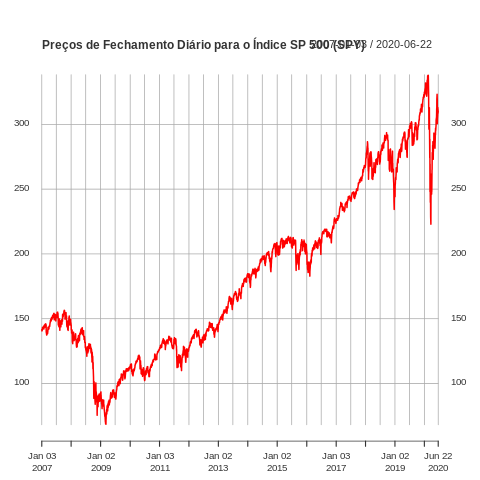

In [57]:
%%R
# Plot
plot(SPY.Close, main = "Preços de Fechamento Diário para o Índice SP 500 (SPY)",
     col = "red",xlab = "Data", ylab = "Preço", major.ticks = 'years',
     minor.ticks = FALSE)

In [58]:
%%R
# Log returns
SPY.ret <- diff(log(SPY.Close), lag = 1)
SPY.ret <- SPY.ret[-1]

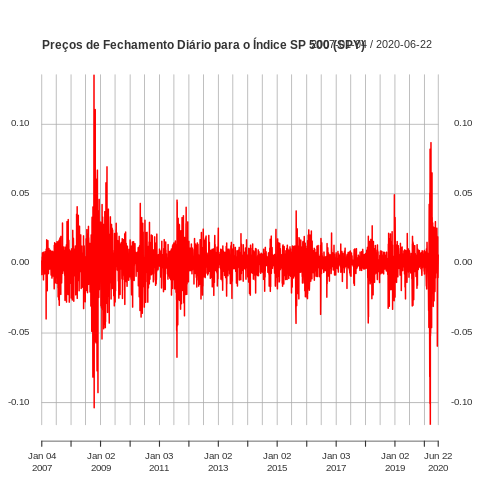

In [60]:
%%R
# Plot
plot(SPY.ret, main = "Preços de Fechamento Diário para o Índice SP 500 (SPY)",
     col = "red", xlab = "Data", ylab = "Retorno", major.ticks = 'years',
     minor.ticks = FALSE)

In [61]:
%%R
# Estatísticas da Série Temporal

# Vetor c/ nomes das estatísticas
statNames <- c("media", "desvio padrao", "assimetria", "curtose")
# Vetor executando os cálculos
SPY.stats <- c(mean(SPY.ret), sd(SPY.ret), skewness(SPY.ret), kurtosis(SPY.ret))
# Nomear vetor
names(SPY.stats) <- statNames
# Show
SPY.stats

        media desvio padrao    assimetria       curtose 
 0.0002322094  0.0131124460 -0.3621326957 17.4733954309 
